In [4]:
import pandas as pd
df = pd.read_csv('babies.csv')
#Vì khi em đọc file vào thì nó đã nhập 2 cột bwt và smoke thành 1 nên em phải em tách nó ra
# Tách cột "bwt" và "smoke" từ cột "bwt smoke"
df[['bwt', 'smoke']] = df['bwt smoke'].str.split(expand=True)

# Xóa cột "bwt smoke"
df.drop(columns=['bwt smoke'], inplace=True)
df.head()

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1


In [5]:
df.columns

Index(['bwt', 'smoke'], dtype='object')

In [7]:
df.dtypes

bwt      object
smoke    object
dtype: object

In [8]:
# Chuyển đổi kiểu dữ liệu của cột "bwt" và "smoke" thành số
df['bwt'] = pd.to_numeric(df['bwt'], errors='coerce')
df['smoke'] = pd.to_numeric(df['smoke'], errors='coerce')

# Kiểm tra giá trị thiếu
df.isnull().sum()


bwt      0
smoke    0
dtype: int64

In [9]:
# Tính giá trị thống kê cho từng nhóm
mean_bwt_nonsmokers = df[df['smoke'] == 0]['bwt'].mean()
mean_bwt_smokers = df[df['smoke'] == 1]['bwt'].mean()

median_bwt_nonsmokers = df[df['smoke'] == 0]['bwt'].median()
median_bwt_smokers = df[df['smoke'] == 1]['bwt'].median()

# In ra các giá trị thống kê
print("Trung bình cân nặng của trẻ trong nhóm không hút thuốc:", mean_bwt_nonsmokers)
print("Trung bình cân nặng của trẻ trong nhóm hút thuốc:", mean_bwt_smokers)
print("Median cân nặng của trẻ trong nhóm không hút thuốc:", median_bwt_nonsmokers)
print("Median cân nặng của trẻ trong nhóm hút thuốc:", median_bwt_smokers)


Trung bình cân nặng của trẻ trong nhóm không hút thuốc: 123.04716981132076
Trung bình cân nặng của trẻ trong nhóm hút thuốc: 114.10950413223141
Median cân nặng của trẻ trong nhóm không hút thuốc: 123.0
Median cân nặng của trẻ trong nhóm hút thuốc: 115.0


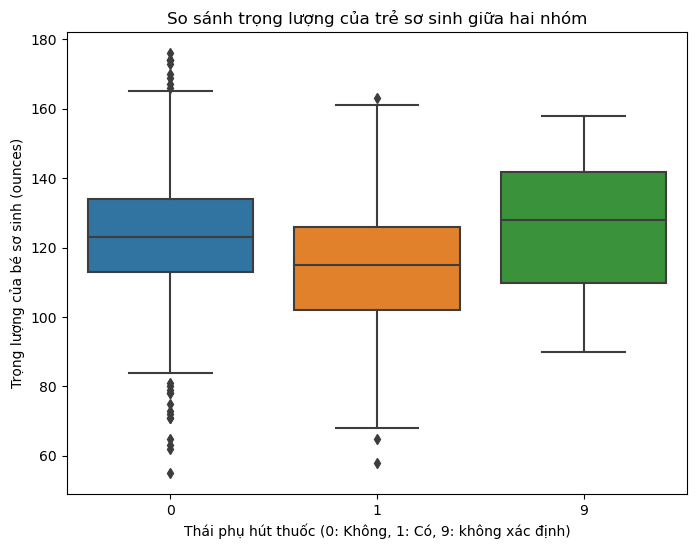

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoke', y='bwt', data=df)
plt.xlabel('Thái phụ hút thuốc (0: Không, 1: Có, 9: không xác định)')
plt.ylabel('Trọng lượng của bé sơ sinh (ounces)')
plt.title('So sánh trọng lượng của trẻ sơ sinh giữa hai nhóm')
plt.show()


In [ ]:
Trung bình cân nặng của trẻ sơ sinh trong nhóm không hút thuốc (123.05) cao hơn so với nhóm hút thuốc 
(114.11). Điều này ngụ ý rằng trẻ sơ sinh trong nhóm không hút thuốc có cân nặng cao hơn so với nhóm hút thuốc.

Median cân nặng của trẻ sơ sinh trong nhóm không hút thuốc (123.0) cũng cao hơn so với nhóm hút thuốc 
(115.0) với nhóm không hút thuốc có cân nặng trung bình cao hơn.

Dựa vào các giá trị này, có dấu hiệu cho thấy trẻ sơ sinh trong nhóm không hút thuốc có xu hướng có cân nặng 
cao hơn so với nhóm hút thuốc